In [42]:
import jieba
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [2]:
df=pd.read_csv('Top 200 online novels.csv',header=None,names=['title','writer','genre','sub_genre','intro','word'])

In [3]:
df.head()

,title,writer,genre,sub_genre,intro,word
0,圣墟,辰东,玄幻,东方玄幻,在破败中崛起，在寂灭中复苏。沧海成尘，雷电枯竭，那一缕幽雾又一次临近大地，世间的枷锁被打开了...,350.97万字
1,飞剑问道,我吃西红柿,仙侠,古典仙侠,在这个世界，有狐仙、河神、水怪、大妖，也有求长生的修行者。修行者们，开法眼，可看妖魔鬼怪。炼...,84.18万字
2,修真聊天群,圣骑士的传说,都市,异术超能,某天，宋书航意外加入了一个仙侠中二病资深患者的交流群，里面的群友们都以‘道友’相称，群名片都...,541.9万字
3,一念永恒,耳根,仙侠,幻想修仙,一念成沧海，一念化桑田。一念斩千魔，一念诛万仙。唯我念……永恒这是耳根继《仙逆》《求魔》《我...,369.04万字
4,汉乡,孑与2,历史,架空历史,我们接受了祖先的遗产，这让中华辉煌了数千年，我们是如此的心安理得，从未想过要回归那个在刀耕火...,134.55万字


In [4]:
def clean(z):
    return float(str(z)[:(len(str(z))-2)])
df['word_count']=df['word'].apply(clean).apply(int)
df['word_count'].min()

18

In [6]:
df['word_count'].max()

1708

In [7]:
len(df[df['word_count']>1000])

3

# How many words do online novels have?

I grabbed the information of top 200 online novels on the basis of their click rates on qidian zhong wen wang(起点中文网). After the analysis of their word counts, I got the graph below. I found that 46 books have more than 830000 words but less than 1480000 words. Three books even have more than ten million words. 

Compared with printing books, online books have much more words. In general, we ragard A Dream in Red Mansions() as a especially long one among printing books. It has 1070000 words and even the shortest one among the 200 online has more words than it. It is 纣临 with 18 million words.

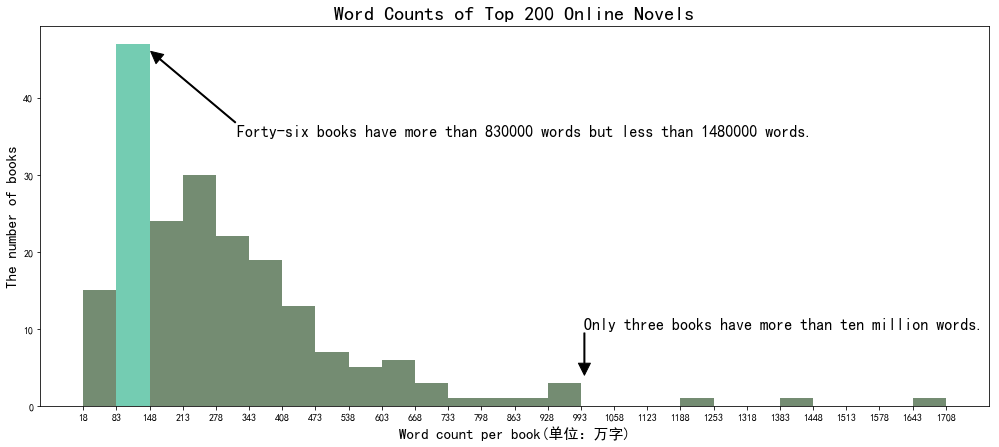

In [89]:
x=df['word_count']>=83 
x &= df['word_count']<=148
plt.subplots(figsize=(17,7)) 
plt.hist(df[-x]['word_count'],bins=26,facecolor='red')

plt.hist(df['word_count'],bins=26,facecolor='#46bc99',alpha=0.75)

plt.title('Word Counts of Top 200 Online Novels',fontsize=20)
plt.xlabel('Word count per book(单位：万字)',fontsize=15)
plt.ylabel('The number of books',fontsize=15)
plt.xticks(range(18, 1709, 65))
plt.annotate('Forty-six books have more than 830000 words but less than 1480000 words.', xy=(150, 46), xytext=(320, 35),fontsize=16,
            arrowprops=dict(facecolor='black', width=1))
plt.annotate('Only three books have more than ten million words.', xy=(1000, 4), xytext=(1000, 10),fontsize=16,
            arrowprops=dict(facecolor='black', width=1))
plt.rcParams['font.sans-serif']=['SimHei']

# What kinds of online novels are most popluar?


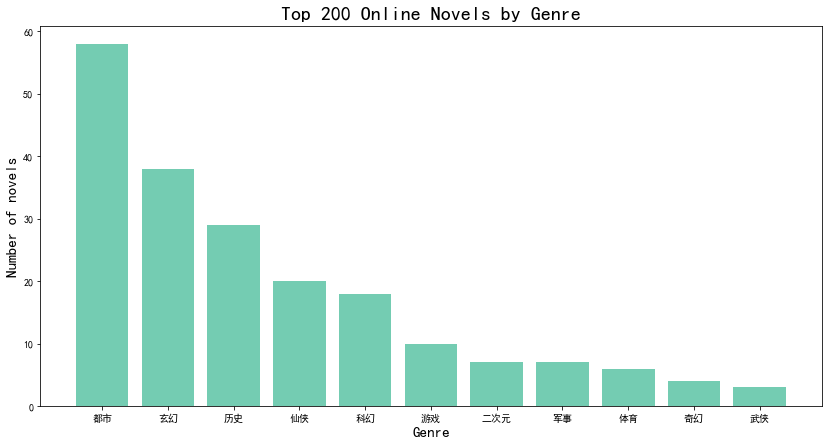

In [99]:
fig=plt.figure(figsize=(14,7))
plt.bar(genre1.index,genre1.values,color='#46bc99',alpha=0.75)
plt.title('Top 200 Online Novels by Genre',fontsize=20)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Number of novels',fontsize=15)
plt.rcParams['font.sans-serif']=['SimHei']

# What is the main content of online novels?

After analysis of genres of the 200 books, I found the the top 3 popular genres are metropolitan novel('都市'), fantasy novel('玄幻') and history novel('历史'). Then I got the introduction of novels of the three genres and analyzed their word frequencies.

In [ ]:
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r').readlines()]  
    return stopwords
stopwords = stopwordslist('stop_words.txt')
stopwords.extend(['群','中','一名','说','里','这是','这是','成','前','做','想','年','我要','天','一场','真的','一种','纷纷','做','有人','本书','回到','那种'])

def mycloud(s):
    a=''
    for i in df[df['genre']==s]['intro']:
        a=a + str(i)
    intro1=list(jieba.cut(a))
    intro2=[]
    for i in intro1:
        if i not in stopwords:
            intro2.append(i)
    x=pd.Series(intro2).value_counts().head(200)
    wc = WordCloud(background_color="white",font_path='msyh.ttf',max_words=2000,
                   max_font_size=60, random_state=40)
    wc.generate_from_frequencies(x)
    plt.figure(figsize=(14, 7))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

As the graph below shows, metropolitan novel is always the story about '穿越', '人生', '重生', '装备' and '爱'. So in the work of online writers, there are so many time-travel stories（'穿越'） happening in cities and video game（'装备'） is as important as love('爱') to their characters.

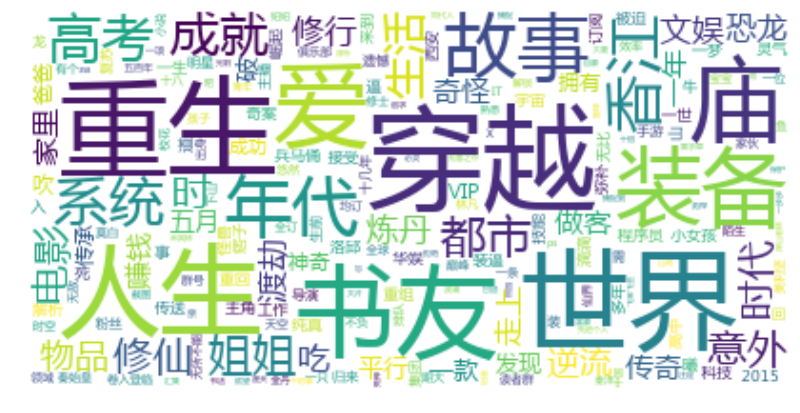

In [50]:
mycloud('都市')

Fantasy novel is always the story about '世界', '武道', '巫师','强者' and '神秘'.

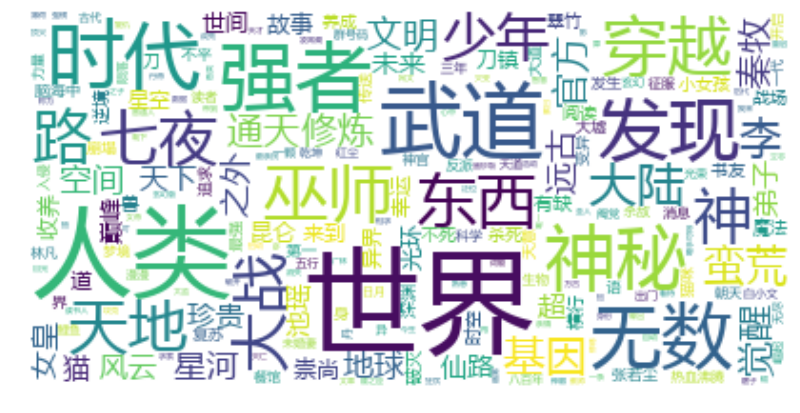

In [51]:
mycloud('玄幻')

History novel is always the story about '天下', '穿越', '大明', '千古' and '贾府'. Why is Ming Dynasty frequently mentioned in online novels? What happened in Ming Dynasty in online novels? If you are interested, you can take time to read some online novels to find out the answer.

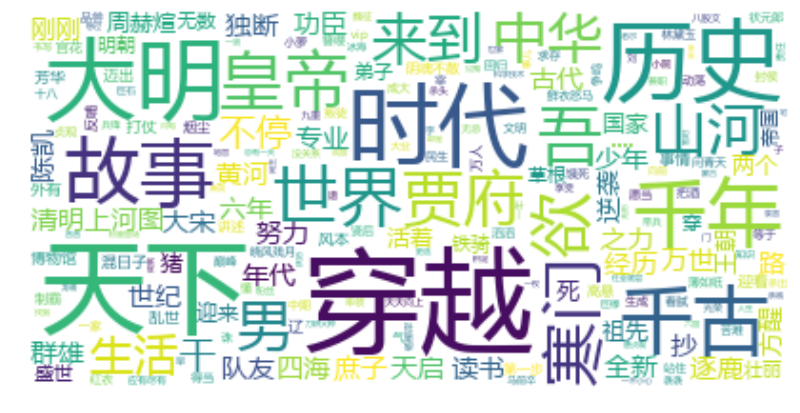

In [55]:
mycloud('历史')